# Evaluación de Precios y optimización de lista de productos

***Autor:*** *Daniel Andrés Castañeda*

## Introducción
En la actualidad, con los avances de tecnología de la información y el crecimiento del e-comerce, los usuarios tienen cada vez más capacidad de decisión sobre los productos que adquieren y consumen, esto debido a una alta disponibilidad y variedad de posibilidades de ítems de la canasta básica, el abanico de posibilidades se expande cuando consideramos distintos almacenes o tiendas y podemos comparar sus productos. En ocasiones decidir el producto más económico y encontrar todo en un solo lugar se dificulta cuando se consideran todas las posibilidades.
Este proyecto se centra en abordar el proceso de decisión por precio de diferentes productos de una lista de compras teniendo en cuenta elementos como el presupuesto, disponibilidad en almacenes y movilización de un almacén a otro.

La minería de datos, en su capacidad de descubrir patrones y relaciones en grandes conjuntos de datos, ofrece un potencial significativo para agrupar, organizar y determinar qué elementos de la lista de productos es la mejor opción. 

La metodología de este este proyecto se implica la recolección y el análisis de datos de productos de diversas tiendas minoristas y almacenes de cadena, utilizando técnicas de raspado web para obtener información relevante como nombres de productos, marcas, presentaciones y precios.

Posteriormente, estos datos son sometidos a un proceso de limpieza, preprocesamiento y un análisis exploratorio, preparándolos para su uso en diferentes modelos. Los modelos y técnicas seleccionados serán aplicados con el fin de identificar la opción más económica de compra.


## Descripción de la base de datos

### Origen de Datos

La base de datos presentada a continuación tiene origen en la página web [Los precios](https://losprecios.co/) la cual se encarga de recopilar y presentar precios de distintos almacenes de cadena y tiendas del país, se extraen datos directamente desde la página mediante técnicas de raspado web por lo que se requiere definir los parámetros de búsqueda y programar el proceso de extracción de manera que se puedan extraer los precios para los productos de internet.

El proyecto pretende utilizar técnicas de aprendizaje supervisado y no supervisado para extraer información útil en el proceso de decisión.


La base de datos extraida presenta las siguientes características:

In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import openai
from openai import OpenAI
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.read_csv('precios.csv').drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12341 entries, 0 to 12340
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nombre        12341 non-null  object
 1   marca         12341 non-null  object
 2   presentacion  12341 non-null  object
 3   precio        12341 non-null  object
 4   lugar         12341 non-null  object
dtypes: object(5)
memory usage: 482.2+ KB


Al extraer la información nos encontramos con 12341 ítems distintos extraídos para los Almacenes Éxito (7984 ítems) y Jumbo (2789 ítems) y las tiendas Ara (697 ítems) y D1 (871 ítems) para los cuales se extrajo la siguiente información:
* nombre: corresponde al nombre que recibe cada producto en el almacén es una variable nominal.
  
* marca: corresponde a la marca del producto la cual también puede funcionar como variable nominal.
  
* presentación: esta variable contiene tanto la cantidad de producto en la presentación como la unidad de medición del producto que puede estar en unidades de gramos, miligramos, kilogramos, litros, mililitros, etc. que nos permitirán conocer cuál será la mejor presentación disponible en el almacén para el producto que buscamos comprar, en este caso la variable fue extraída como tipo `objeto` lo cual es contraproducente para el análisis que deseamos hacer.

* precio: corresponde al precio en pesos colombianos sin embargo en el proceso de extracción se guardó como tipo `object` debido a que cuenta con un carácter alfanumérico. 

* lugar: El lugar corresponde al nombre del almacén en el que se encuentra el producto y puede hacer las veces de variable categórica ordinal.

## Objetivo del análisis
El objetivo del análisis es extraer, organizar y analizar la información de forma que permita al consumidor encontrar los productos en la mejor presentación, optimizando la ejecución del presupuesto.

## Metodología.
En primera instancia se utilizan técnicas de raspado web para extraer los datos de la página de [losprecios.co](https://losprecios.co), debido a que la estructura de la web en cuestión divide cada uno de los almacenes en una url distinta o en una entidad distinta debemos hacer un análisis inicial a ésta url, y a la cantidad de páginas a visitar.

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 486.73 71.35"><defs><style>.cls-1{fill:none;stroke:#000;stroke-miterlimit:10;}.cls-2,.cls-4{font-size:12px;font-family:MyriadPro-Regular, Myriad Pro;}.cls-2{letter-spacing:0em;}.cls-3{letter-spacing:0em;}.cls-5{letter-spacing:0em;}.cls-6{letter-spacing:0.01em;}.cls-7{letter-spacing:-0.01em;}.cls-8{letter-spacing:-0.02em;}.cls-9{letter-spacing:-0.01em;}.cls-10{letter-spacing:-0.01em;}.cls-11{letter-spacing:0em;}.cls-12{letter-spacing:-0.01em;}.cls-13{letter-spacing:-0.01em;}.cls-14{letter-spacing:0em;}</style></defs><g id="Capa_2" data-name="Capa 2"><g id="Capa_1-2" data-name="Capa 1"><image width="451" height="40" transform="translate(0 15.16)" xlink:href="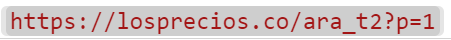"/><rect class="cls-1" x="102.5" y="15.16" width="193" height="40"/><text class="cls-2" transform="translate(102.63 10.04)">D<tspan class="cls-3" x="8.04" y="0">ominio</tspan></text><rect class="cls-1" x="296" y="15.16" width="88" height="40"/><rect class="cls-1" x="395" y="15.16" width="46" height="40"/><text class="cls-4" transform="translate(295.87 10.35)">Ide<tspan class="cls-5" x="15.65" y="0">n</tspan><tspan class="cls-3" x="22.26" y="0">tificador de tienda</tspan></text><text class="cls-4" transform="translate(394.81 68.35)">sele<tspan class="cls-6" x="19.61" y="0">c</tspan><tspan class="cls-7" x="25.14" y="0">t</tspan><tspan x="29.04" y="0">or de pa</tspan><tspan class="cls-7" x="70.03" y="0">g</tspan><tspan x="76.67" y="0">ina</tspan></text><rect class="cls-1" x="5" y="15.16" width="96" height="40"/><text class="cls-4" transform="translate(4.87 68.35)"><tspan class="cls-8">P</tspan><tspan class="cls-9" x="6.19" y="0">r</tspan><tspan x="10" y="0">o</tspan><tspan class="cls-7" x="16.58" y="0">t</tspan><tspan x="20.48" y="0">o</tspan><tspan class="cls-10" x="27.07" y="0">c</tspan><tspan x="32.38" y="0">olo de t</tspan><tspan class="cls-11" x="70.22" y="0">r</tspan><tspan x="74.09" y="0">ans</tspan><tspan class="cls-12" x="91.28" y="0">f</tspan><tspan x="94.63" y="0">e</tspan><tspan class="cls-13" x="100.64" y="0">r</tspan><tspan class="cls-14" x="104.45" y="0">encia</tspan></text></g></g></svg>

La url se compone de 4 partes, el protocolo de transferencia utilizado para enviar datos entre el navegador y el sitio web, el dominio que corresponde al nombre único con el que se identifica la dirección de la página a la cual queremos extraer la información, el identificador de tienda que como su nombre lo dice, nos señala de que tienda estamos extrayendo los recursos, y el selector de página que nos ayuda a identificar la página de la que estamos extrayendo la información.



Debido a que no conocemos la cantidad exacta de páginas que puede tener cada almacén o tienda lo primero que necesitamos hacer es identificar la cantidad máximas de páginas que se tiene para cada una de ellas por lo que lo mejor será quedarnos con la última página que tiene datos disponibles.



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [47]:
import requests
from bs4 import BeautifulSoup

def eval_cantidad_items_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Esto lanzará una excepción si la respuesta es un error
        soup = BeautifulSoup(response.text, 'html.parser')
        conts = soup.find_all(class_='bq-cn-r')
        return len(conts)
    except requests.RequestException as e:
        print(f"Error al realizar la solicitud HTTP: {e}")
        return 0

def max_pages_binary_search(url, max_limit):
    low = 1
    high = max_limit
    while low <= high:
        mid = (low + high) // 2
        if eval_cantidad_items_page(url.format(mid)) > 0 and eval_cantidad_items_page(url.format(mid + 1)) == 0:
            return mid
        elif eval_cantidad_items_page(url.format(mid)) == 0:
            high = mid - 1
        else:
            low = mid + 1
    return -1  # Retorna -1 si no encuentra ninguna página válida

# URL de ejemplo, reemplaza con la URL adecuada
urls = {
    'Éxito':'https://losprecios.co/%C3%A9xito_t6?p={}',
    'Ara':'https://losprecios.co/ara_t2?p={}',
    'Jumbo':'https://losprecios.co/jumbo_t7?p={}',
    'D1':'https://losprecios.co/d1_t1?p={}',
}
max_pages = {}
for i in urls:
    url = urls[i]
    max_pages[i] = max_pages_binary_search(url,1000)


Se implementa una estrategia de búsqueda binaria para dar con la ultima página de cada tienda, asumiendo que el valor maximo de cada tienda es inferior a las mil paginas.
Para saber la cantidad de productos diponibles en cada página se hizo uso de un selector css de clase `.bq-cn-r` el cual correspondía a la clase que identifica los contenedores de productos, por lo que la pagina que no tuviera estos selectores nos arrojaría un array vacío de longitud 0.
De este modo, se configura el algoritmo de búsqueda binaria para dar con la última página con información para cada tienda o almacen obteniendo los siguientes resultados:

* Éxito con 799 páginas.

* Jumbo con 279 páginas.

* Ara con 70 páginas.

* D1 con 88 páginas.


Posteriormente se implementa la rutina de raspado de datos para cada una de las páginas de los distintos almacenes y se extrae la información de cada producto presente usando los selectores `.mrg-0` para el encabezado de cada producto donde se encuentra el nombre del producto, la marca y la presentación, y posteriormente se extrae la información de precio a través del selector `.t-ed-pr`.

In [53]:
datos = []
def raspar_datos(url, nombre_tienda, max_pagina):
    for i in range(1, max_pagina + 1):
        response = requests.get(url.format(i))
        soup = BeautifulSoup(response.text, 'html.parser')
        conts = soup.find_all(class_='bq-cn-r')
        for cont in conts:
            cont_text = cont.find(class_='mrg-0')
            cont_nombre = cont_text.find(class_='eít-enl-p')
            nombre = cont_nombre.text
            marca = cont_nombre.find_next('span').find_next('span').text
            presentacion = cont.find(class_='no-lín').text
            precio = cont.find(class_='t-ed-pr').text

            # Añadiendo al conjunto de datos
            datos.append({
                'nombre': nombre,
                'marca': marca,
                'presentacion': presentacion,
                'precio': precio,
                'lugar': nombre_tienda
            })
        
        if i%20 == 0: 
            print(f'página {i} de {max_pagina}') 
            
        elif i==max_pagina: print(f'página {i} de {max_pagina}')

# Raspado para cada tienda
for tienda, url in urls.items():
    print(f"Raspando datos de {tienda}...")
    raspar_datos(url, tienda, max_pages[tienda])

# Creando el DataFrame
df = pd.DataFrame(datos)

# Mostrando algunos datos
df.head()


Raspando datos de Éxito...
página 20 de 799
página 40 de 799
página 60 de 799
página 80 de 799
página 100 de 799
página 120 de 799
página 140 de 799
página 160 de 799
página 180 de 799
página 200 de 799
página 220 de 799
página 240 de 799
página 260 de 799
página 280 de 799
página 300 de 799
página 320 de 799
página 340 de 799
página 360 de 799
página 380 de 799
página 400 de 799
página 420 de 799
página 440 de 799
página 460 de 799
página 480 de 799
página 500 de 799
página 520 de 799
página 540 de 799
página 560 de 799
página 580 de 799
página 600 de 799
página 620 de 799
página 640 de 799
página 660 de 799
página 680 de 799
página 700 de 799
página 720 de 799
página 740 de 799
página 760 de 799
página 780 de 799
página 799 de 799
Raspando datos de Ara...
página 20 de 70
página 40 de 70
página 60 de 70
página 70 de 70
Raspando datos de Jumbo...
página 20 de 279
página 40 de 279
página 60 de 279
página 80 de 279
página 100 de 279
página 120 de 279
página 140 de 279
página 160 de 279
p

,nombre,marca,presentacion,precio,lugar
0,Leche Larga Vida Descremada,Alquería,1 000 ml,3 970 $,Éxito
1,Leche Larga Vida Descremada Deslactosada,Finesse,3 300 ml,10 590 $,Éxito
2,Leche Pasteurizada Descremada,Colanta,1 000 ml,2 280 $,Éxito
3,Leche Larga Vida Descremada Deslactosada,Alpina,1 000 ml,7 520 $,Éxito
4,Leche Larga Vida Descremada Deslactosada,Alpina,200 ml,2 564 $,Éxito


Al observar la salida de los datos, notamos que todos los valores se encuentran en formato `str` por lo que debemos extraer las caracteristicas más importantes de cada uno de estos.

In [172]:
import spacy

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

def extraer_sujeto(texto):
    doc = nlp(texto)
    for token in doc:
        # Buscar el sujeto nominal (nominal subject)
        if 'subj' in token.dep_:
            return token.text

# Ejemplo de uso
oracion = "Whisky añejo"
# sujeto = extraer_sujeto(oracion)
# print(f"El sujeto extraído es: {sujeto}")
def extraer_sujeto2(texto):
    doc = nlp(texto)

    for token in doc:
        if 'ROOT' ==token.dep_:
            return token.text


A continuación se realiza la normalización de algunos valores tanto de la presentación como de las unidades y precios del producto.

In [785]:

df_precios = df.copy()
df_precios["unidades"] = df_precios["presentacion"].apply(lambda x: x.split(' ')[-1])
mask = ~df_precios['unidades'].isin(["par",'indeterminada','UI','cm2','noches'])
df_precios = df_precios[mask]
df_typed = df_precios.copy()
df_typed["tipo"] = [extraer_sujeto2(word) for word in df_typed["nombre"]]
# df_typed["tipo"] = [extraer_tipo_producto(word) for word in df_precios["nombre"]]
df_typed["precio"] = df_typed["precio"].replace(["\u202f"," "],"", regex=True).apply(lambda x: x.split("$")[0]).astype(int)
# df_typed["presentacion"] = df_typed["presentacion"].replace(["\u202f"," "],"", regex=True).apply(lambda x: x.split("g")[0])
# df_typed["presentacion"] = df_typed["presentacion"].replace(["\u202f"," "],"", regex=True).apply(lambda x: x.split("ml")[0])
# df_typed["presentacion"] = df_typed["presentacion"].replace(["\u202f"," "],"", regex=True).apply(lambda x: x.split("unidades")[0])
# df_typed["presentacion"] = df_typed["presentacion"].replace(["\u202f"," "],"", regex=True).apply(lambda x: float(x.split("k")[0]))
presentacion = []
unidades = []
for i in df_typed["presentacion"]:
    if i.__contains__('kg'):
        i = i.replace('kg','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)*1000
        unidades.append("g")
        presentacion.append(i)
    elif i.__contains__('mg'):
        i = i.replace('mg','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)/1000
        unidades.append("g")
        presentacion.append(i)
    elif i.__contains__('ml'):
        i = i.replace('ml','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)
        unidades.append("ml")
        presentacion.append(i)
    elif i.__contains__('l'):
        i = i.replace('l','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)*1000
        unidades.append("ml")
        presentacion.append(i)
    elif i.__contains__('unidades'):
        i = i.replace('unidades','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)
        unidades.append("unidades")
        presentacion.append(i)
    elif i.__contains__('unidad'):
        i = i.replace('unidad','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)
        unidades.append("unidades")
        presentacion.append(i)
    elif i.__contains__('g'):
        i = i.replace('g','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)
        unidades.append("g")
        presentacion.append(i)
    elif i.__contains__('m'):
        i = i.replace('m','')
        i = i.replace("\u202f","")
        i = i.replace(" ","")
        i = float(i)
        unidades.append("m")
        presentacion.append(i)

df_typed["presentacion"] = presentacion
df_typed["unidades"] = unidades
df_typed = df_typed[df_typed["tipo"].apply(type) != type(None)]
df_typed["marca"][df_typed["marca"].str.contains('del ')] = df_typed["marca"][df_typed["marca"].str.contains('del ')].str.replace('del ','')
df_typed["marca"][df_typed["marca"].str.contains('Del ')] = df_typed["marca"][df_typed["marca"].str.contains('Del ')].str.replace('Del ','')

/tmp/ipykernel_73881/2750414493.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typed["marca"][df_typed["marca"].str.contains('del ')] = df_typed["marca"][df_typed["marca"].str.contains('del ')].str.replace('del ','')
/tmp/ipykernel_73881/2750414493.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typed["marca"][df_typed["marca"].str.contains('Del ')] = df_typed["marca"][df_typed["marca"].str.contains('Del ')].str.replace('Del ','')


Se extraen los elementos de *unidades de medida* desde la **presentación** y se eliminan aquellas unidades que no aportan valor al análisis ya que son productos no contemplados en el actual proyecto, algunas unidades de medición que se excluyeron son: "par",'indeterminada','UI','cm2','noches'. adicionalmente se implementa una estrategia de **análisis no supervisado** para extraer los sustantivos del **nombre** del producto y poder saber de que *tipo* de producto en cuestión estamos hablando, la estrategia usada corresponde a ***tokenización*** y ***etiquetado*** para cada una de las palabras en el nombre del producto con el fin de extraer los sustantivos mediante la librería `spacy`. 

Posteriormente se realiza la rutina de limpieza a los **precios** con el fin de eliminar el símbolo "$" y los espacios en blanco convirtiendo esta variable en un valor `int`.

Por ultimo se llevan todas las unidades de medida a una misma escala, se depuran espacios en blanco y se guarda la variable en formato `float`, finalmente se eliminan los elementos `NoneType` para poder realizar los análisis pertinentes.

In [ ]:
import openai
from openai import OpenAI
import time
import numpy as np

def clasificar_producto(producto):
    try:
        # Para ejecutar esta parte del codigo es necesario crear una clave de API para OpenAI y agregarla al modelo
        # client = OpenAI(api_key = 'Clave API')
        client = OpenAI()

        completion = client.chat.completions.create(
          model="gpt-4-1106-preview",
          # model='gpt-3.5-turbo-1106',
          messages=[
            {"role": "system", "content": "Menciona unicamente una de las siguientes categorias: 'Alimentos Frescos', 'Alimentos Secos y Enlatados', 'Bebidas', 'Snacks y Golosinas', 'Productos de Panadería y Cereal', 'Congelados', 'Productos de Limpieza y Hogar', 'Cuidado Personal', 'Productos para Bebés', 'Productos de Salud y Farmacia', 'Otros Artículos de Cocina y Hogar', 'Mascotas', 'No Aplica','Bebidas Alcoholicas'"},
            {"role": "user", "content": f"Dime unicamente la categoría del siguiente producto: '{producto}'"}
          ]
        )

        return completion.choices[0].message.content
    except Exception as e:
        print(f"Error al clasificar el producto {producto}: {e}")
        return None

# Lista de tus productos
productos = df_typed["tipo"].unique()
grupos = {}
i = 1
dur =[]
n = len(productos)
for producto in productos:
  start = time.time()
  grupo = clasificar_producto(producto)
  end = time.time()
  dur.append(end-start)
  grupos[producto]=grupo
  if i%20 == 0 or i == n:
    print(f"{i}/{n} faltan {dur[-1]:.2f} s/t {np.mean(dur)*(n-i)/60:.2f}min")
  i += 1


df_grupos = pd.DataFrame(grupos, index=["grupo"]).transpose()
df_grupos.reset_index(inplace = True)
df_grupos.columns= ["tipo","grupo"]
# df_grupos.to_csv('grupos.csv')

Debido a que al realizar el filtrado de tipo de producto quedan 570 tipos distintos, es necesario buscar una forma de agrupación de estos productos, ya que los valores de precio y presentación no nos servirán para hacer un análisis supervisado de esta manera se plantea el uso de la API de OpenAI con el motor GPT-4 para la identificación y categorización de los tipos de producto antes depurados.

In [786]:
df_grupos["grupo"] = df_grupos["grupo"].str.replace('.', '')
df_grupos["grupo"] = df_grupos["grupo"].str.replace("'", '')
df_grupos["grupo"].unique()

array(['Alimentos Frescos', 'Productos de Salud y Farmacia',
       'Productos de Panadería y Cereal', 'Alimentos Secos y Enlatados',
       'Productos de Limpieza y Hogar',
       'Otros Artículos de Cocina y Hogar', 'Snacks y Golosinas',
       'Bebidas Alcohólicas', 'Congelados', 'Bebidas', 'No Aplica',
       'Mascotas', 'Productos para Bebés'], dtype=object)

Logramos reducir 570 tipos de productos 13 grupos distintos quedando con un total de 9527 items no obstante ya que el algoritmo en la práctica no tiene una efectividad total es necesario hacer algunas correcciones, estas a termino práctico se hicieron a través de tanteo

In [706]:
df_complete = pd.merge(left=df_typed, right=(df_grupos), on = "tipo")
df_filtered = df_complete[df_complete["grupo"] != 'No Aplica'][df_complete["grupo"] != 'Productos de Salud y Farmacia']
df_filtered.loc[9485]["grupo"] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Papas Fritas')
df_filtered.loc[mask, 'tipo'] = 'Papas Fritas'
df_filtered.loc[mask, 'grupo'] = 'Snacks y Golosinas'
mask = df_filtered['nombre'].str.contains('Cong')
df_filtered.loc[mask, 'grupo'] = 'Congelados'
mask = df_filtered['nombre'].str.contains('Francesa')
df_filtered.loc[mask, 'tipo'] = 'Papas a la Francesa'
# df_filtered.loc[mask]
# df_filtered = df_filtered.copy()
display(df_filtered.grupo.unique())

mask = df_filtered['nombre'].str.contains('Alimento para Perros')
df_filtered.loc[mask, 'tipo'] = 'Alimento para Perros'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Alimento para Gatos')
df_filtered.loc[mask, 'tipo'] = 'Alimento para Gatos'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Alimento Húmedo para Perros')
df_filtered.loc[mask, 'tipo'] = 'Alimento Húmedo para Perros'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Alimento Húmedo para Gatos')
df_filtered.loc[mask, 'tipo'] = 'Alimento Húmedo para Gatos'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Alimento Seco para Gatos')
df_filtered.loc[mask, 'tipo'] = 'Alimento para Gatos'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Alimento para Peces')
df_filtered.loc[mask, 'tipo'] = 'Alimento para Peces'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'
mask = df_filtered['nombre'].str.contains('Alimento para Aves')
df_filtered.loc[mask, 'tipo'] = 'Alimento para Aves'
df_filtered.loc[mask, 'grupo'] = 'Mascotas'



/tmp/ipykernel_73881/3570886134.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_complete[df_complete["grupo"] != 'No Aplica'][df_complete["grupo"] != 'Productos de Salud y Farmacia']
/tmp/ipykernel_73881/3570886134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[9485]["grupo"] = 'Mascotas'


array(['Alimentos Frescos', 'Productos de Panadería y Cereal',
       'Alimentos Secos y Enlatados', 'Congelados', 'Snacks y Golosinas',
       'Productos de Limpieza y Hogar',
       'Otros Artículos de Cocina y Hogar', 'Bebidas Alcohólicas',
       'Bebidas', 'Productos para Bebés', 'Mascotas'], dtype=object)

In [707]:
display(df_filtered.describe())
display(df_filtered.info())

,presentacion,precio
count,9308.000000,9308.000000
mean,662.405307,14464.914375
std,1137.160289,28341.110731
min,1.000000,100.000000
25%,156.000000,3820.000000
50%,350.000000,7330.000000
75%,750.000000,14450.000000
max,24000.000000,968700.000000


<class 'pandas.core.frame.DataFrame'>
Index: 9308 entries, 0 to 9613
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nombre        9308 non-null   object 
 1   marca         9308 non-null   object 
 2   presentacion  9308 non-null   float64
 3   precio        9308 non-null   int64  
 4   lugar         9308 non-null   object 
 5   unidades      9308 non-null   object 
 6   tipo          9308 non-null   object 
 7   grupo         9308 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 912.5+ KB


None

Observamos que posterior al ajuste las variables de precio y presentación ya son variables númericas siendo tipo `int` y `float` respectivamente por lo tanto ya podemos realizar un análisis númerico a los datos.

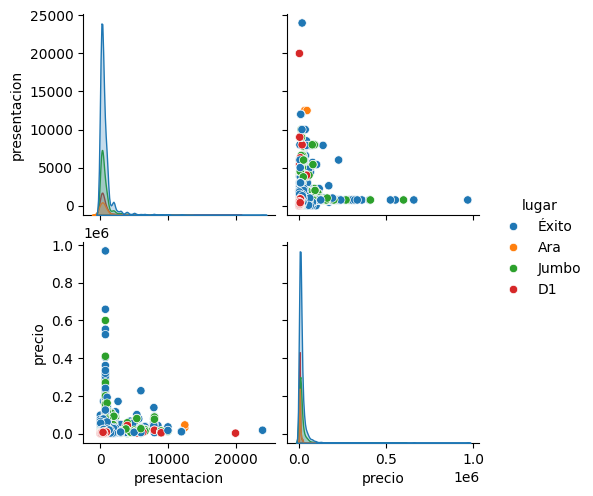

In [708]:
import seaborn as sns
pp = sns.pairplot(df_filtered, hue = "lugar")

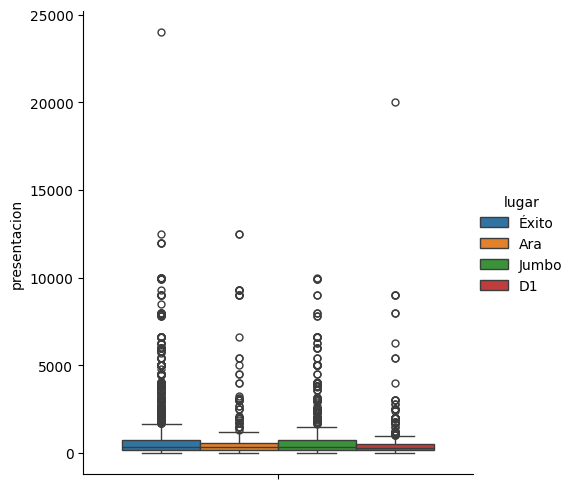

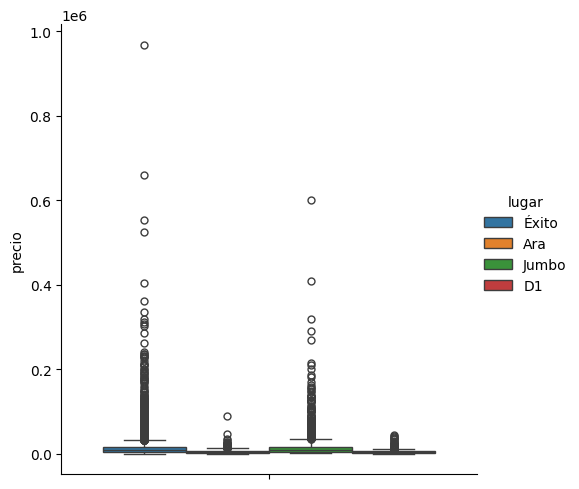

In [709]:
sns.catplot(df_filtered,y = 'presentacion', hue='lugar', kind='box')
sns.catplot(df_filtered,y = 'precio', hue='lugar', kind='box')

Observamos presencia de outliers en los datos principalmente para los almacenes Éxito y Jumbo por lo que uno de los posibles tratamientos explorados será la transformación logaritmica, ya que en su mayoría son datos de menor valor. Entes de realizar la transformación observemos que si existen diferencias en las en los precios de distintas categorías de los productos outlier vs los productos que se encuentran en la normalidad.

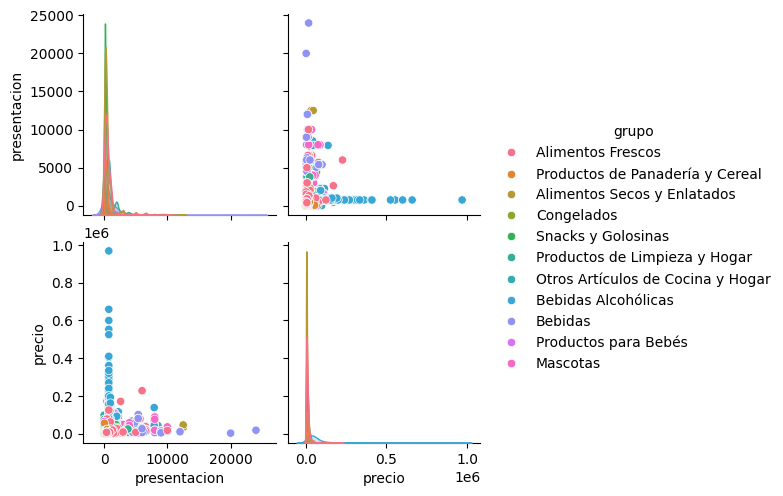

In [710]:
sns.pairplot(df_filtered,hue="grupo")

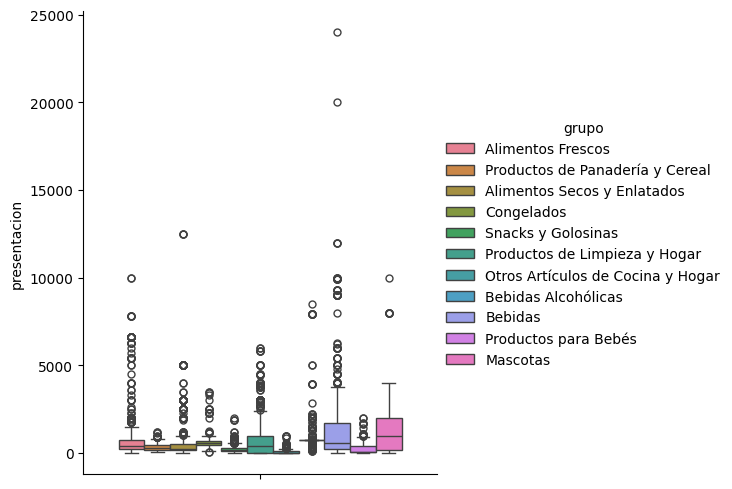

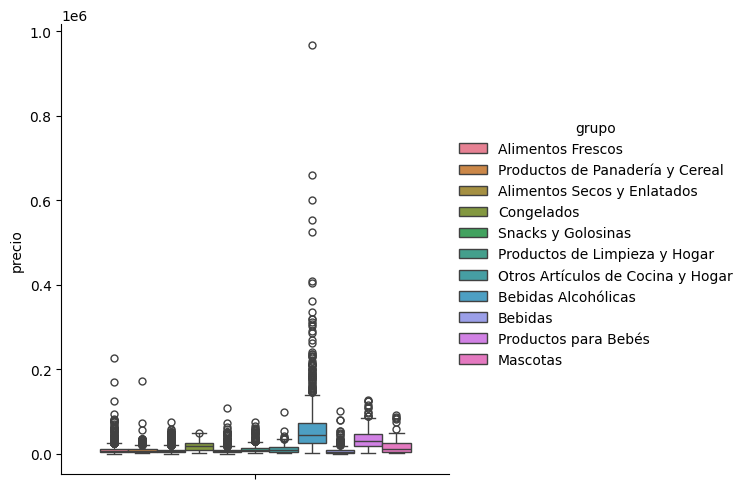

In [711]:
sns.catplot(df_filtered,y = 'presentacion', hue='grupo', kind='box')
sns.catplot(df_filtered,y = 'precio', hue='grupo', kind='box')

Al observar los valores de precio y presentación observamos que ambas tienen una tendencia a tener outliers por lo que una manera de ajustarlos puede ser con una conversión logaritmica, para poder visualizarlos de una mejor manera, observamos también que una de las categorías con mayor precios corresponde a bebidas alcoholicas.

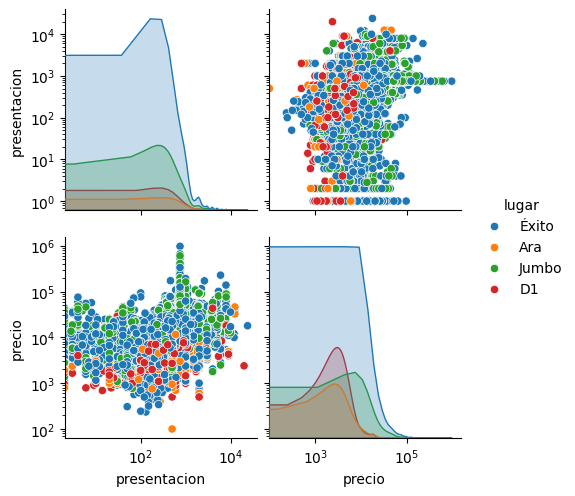

In [712]:
pp = sns.pairplot(df_filtered, hue = "lugar")
for ax in pp.axes.flat:
    ax.set(xscale = 'log',yscale = 'log')

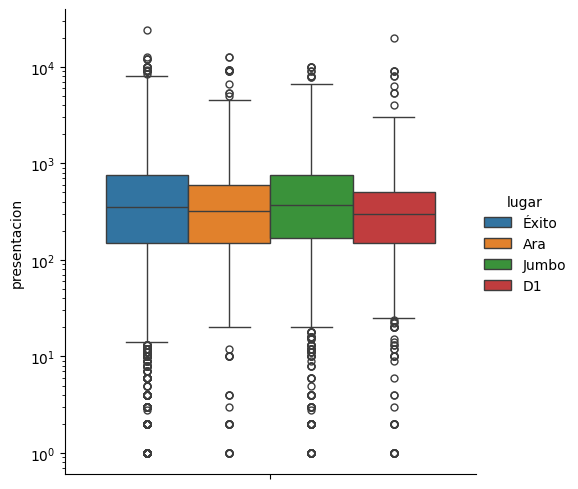

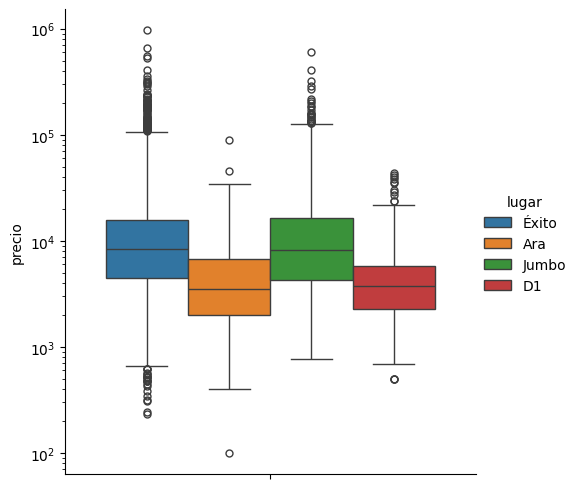

In [713]:
sns.catplot(df_filtered,y = 'presentacion', hue='lugar', kind='box', log_scale=True)
sns.catplot(df_filtered,y = 'precio', hue='lugar', kind='box', log_scale=True)

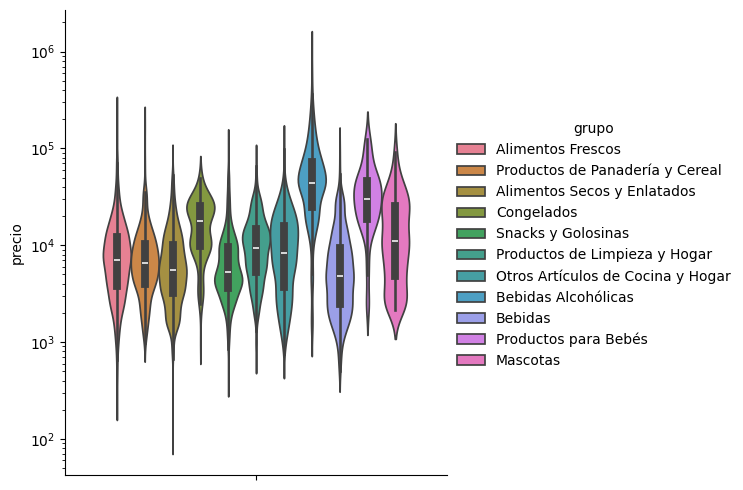

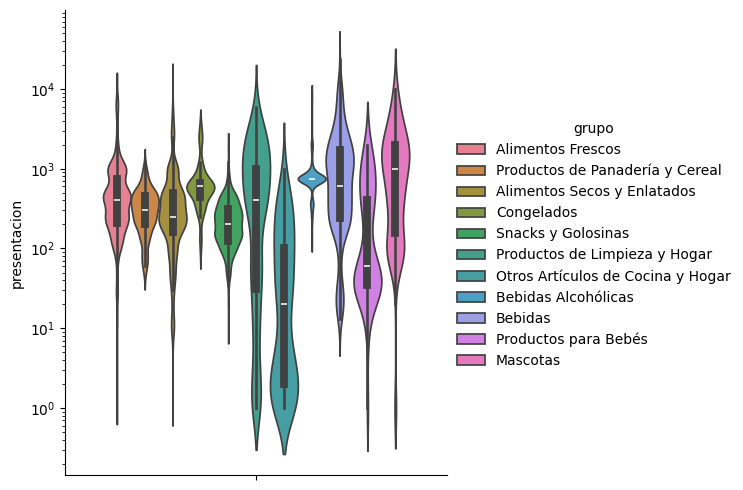

In [714]:
sns.catplot(df_filtered, y = "precio",hue='grupo', log_scale=True,kind='violin' )
sns.catplot(df_filtered, y = "presentacion",hue='grupo', log_scale=True ,kind='violin')

Vemos que con el ajuste de escala logarítmica los datos presentan una mejor dispersión, sin embargo aun sigue habiendo presencia de outliers para precios y presentaciones. Podemos generar escalas de costo de producto para los quantiles 0.25, 0.5, 0.75 de cada grupo

In [715]:
import pandas as pd


# Definir una función para calcular los cuantiles dentro de cada grupo
def calcular_cuantiles_grupo(df, columna_precio, cuantiles):
    # Agrupa por la columna de grupo
    grupos = df.groupby('grupo')

    # Diccionario para almacenar los cuantiles por grupo
    cuantiles_por_grupo = {}

    for nombre_grupo, grupo in grupos:
        cuantiles_grupo = {}
        for q in cuantiles:
            cuantiles_grupo[q] = grupo[columna_precio].quantile(q)
        cuantiles_por_grupo[nombre_grupo] = cuantiles_grupo

    return cuantiles_por_grupo

# Definir los cuantiles que deseas calcular, por ejemplo: 25%, 50%, 75%
cuantiles = [0.25, 0.5, 0.75]

# Calcular los cuantiles para cada grupo
cuantiles_grupos = calcular_cuantiles_grupo(df_filtered, 'precio', cuantiles)

# Ahora puedes usar 'cuantiles_grupos' para categorizar precios dentro de cada grupo
# Aquí hay un ejemplo de cómo podrías hacer esto:

def categorizar_precio_grupo(row, cuantiles_grupos):
    grupo = row['grupo']
    precio = row['precio']
    cuantiles = cuantiles_grupos[grupo]

    if precio <= cuantiles[0.25]:
        return 'Bajo'
    elif precio <= cuantiles[0.5]:
        return 'Medio'
    elif precio <= cuantiles[0.75]:
        return 'Medio-Alto'
    else:
        return 'Alto'

# Aplicar la función de categorización al DataFrame
df_filtered['categoria_precio'] = df_filtered.apply(lambda row: categorizar_precio_grupo(row, cuantiles_grupos), axis=1)

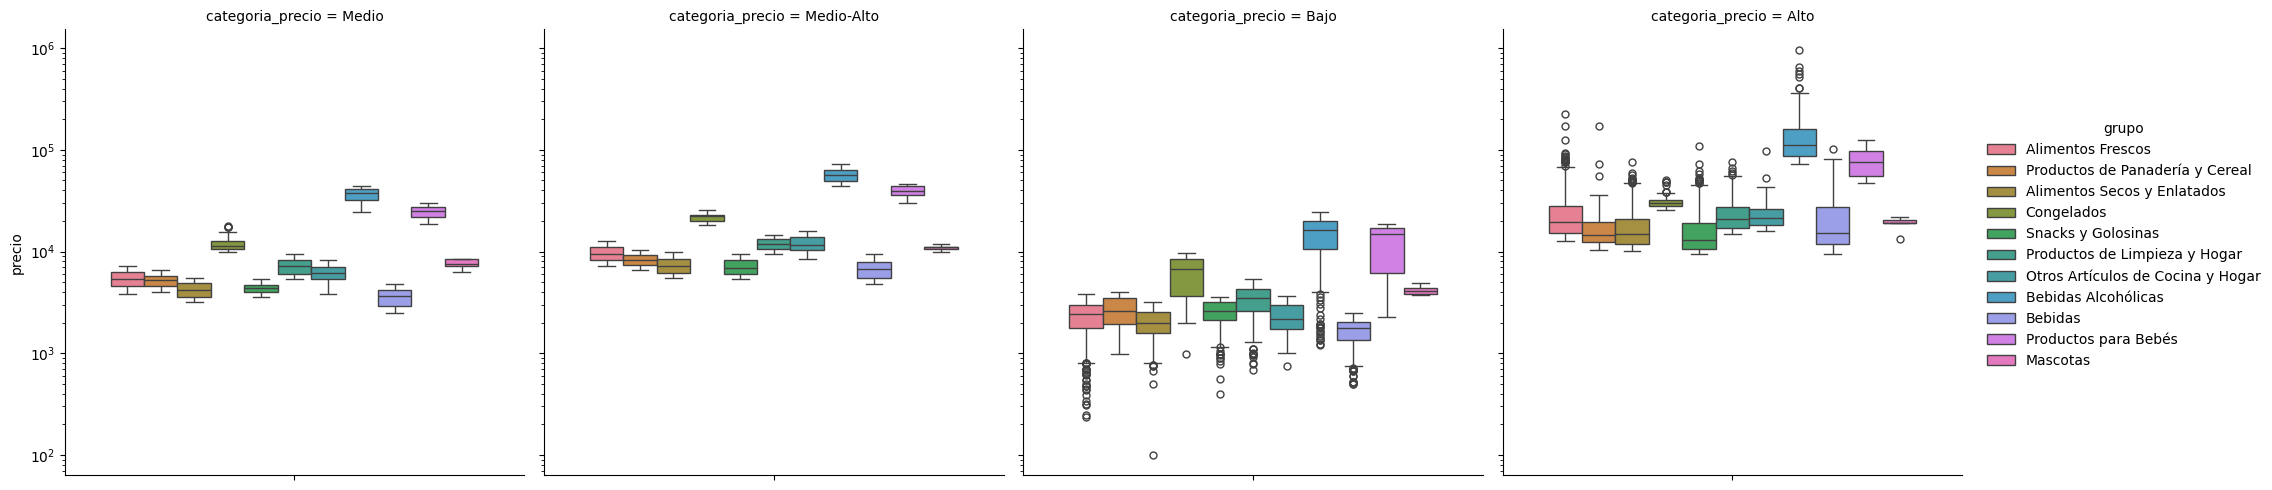

In [502]:
sns.catplot(df_filtered, y = 'precio', kind='box', hue='grupo', col='categoria_precio',log_scale=True)

## Optimización de Lista de Precios

Al realizar un analisis para la optimización de listas de precios intentamos determinar la forma más eficiente y costo-efectiva de comprar una serie de productos deseados dentro de un presupuesto específico, considerando diversos factores como el precio de los productos, la disponibilidad en distintos almacenes y los costos adicionales asociados con el desplazamiento entre estos almacenes. El objetivo principal es maximizar la cantidad de productos adquiridos o cumplir de la mejor manera posible con una lista de compras predefinida, respetando el límite presupuestario.
A continuación, Generamos una Lista de productos aleatoria, que representará la necesidad puntual de algunos productos realizadas por un usuario.


In [644]:
tipos_seleccionados = df_filtered.tipo.sample(40).unique()

df_lista = pd.DataFrame()

for i in tipos_seleccionados:
    df_lista = pd.concat([df_lista,df_filtered[df_filtered["tipo"]==i].sample()])
df_list = df_lista[["tipo",'grupo','presentacion','unidades']].sort_values('grupo')
df_list = df_list.reset_index().drop('index', axis =1)
df_list


,tipo,grupo,presentacion,unidades
0,Pulpa,Alimentos Frescos,230.0,g
1,Huevos,Alimentos Frescos,12.0,unidades
2,Morrillo,Alimentos Frescos,1000.0,g
3,Leche,Alimentos Frescos,180.0,g
4,Contramuslos,Alimentos Frescos,1500.0,g
5,Tostadas,Alimentos Secos y Enlatados,150.0,g
6,Salsa,Alimentos Secos y Enlatados,350.0,g
7,Fríjoles,Alimentos Secos y Enlatados,458.0,g
8,Soya,Alimentos Secos y Enlatados,400.0,g
9,Miel,Alimentos Secos y Enlatados,345.0,g


Se obtinen los productos, por lo que ahora resta maximizar la cantidad de unidades obtenidas de esta lista de productos, manteniendo el gasto total dentro de un presupuesto fijo a Continuación exploraremos dos opciones.


### Planteamiento del Algoritmo Heurístico:

El objetivo del algoritmo es minimizar el costo total de comprar una lista de productos, encontrando para cada producto la opción más barata que cumpla o exceda la presentación deseada.

1. **Conjunto de Datos:**
   - `data`: DataFrame que contiene información sobre productos disponibles, incluyendo tipo, precio, presentación y unidades.
   - `lista_productos_expandida`: DataFrame que enumera los productos deseados, incluyendo el tipo, la presentación deseada y las unidades.

2. **Variables:**
   - No hay variables de decisión en el sentido tradicional de la programación lineal. En su lugar, para cada producto deseado, el algoritmo busca en el conjunto de datos `data` para encontrar la opción más barata.

3. **Proceso de Optimización:**
   - Para cada producto en `lista_productos_expandida`:
     - Se filtra `data` para encontrar todas las opciones disponibles de ese tipo de producto y unidad.
     - Se busca la presentación exacta del producto. Si está disponible, se elige la opción más barata.
     - Si la presentación exacta no está disponible, se buscan opciones con presentaciones más pequeñas. El algoritmo calcula el costo total de comprar múltiples unidades de estas opciones para alcanzar o superar la presentación deseada. Se elige la opción con el menor costo total.

4. **Función Objetiva:**
   - Minimizar el costo total de comprar los productos en `lista_productos_expandida`, seleccionando para cada producto la opción más barata que cumpla o exceda la presentación deseada.

5. **Restricciones:**
   - Cada producto comprado debe cumplir o superar la presentación deseada especificada en `lista_productos_expandida`.
   - Si no hay opciones disponibles que cumplan con la presentación deseada, el producto puede ser excluido o se puede buscar una solución alternativa.

6. **Salida del Algoritmo:**
   - Una lista (`resultados_optimizacion`) que contiene los productos seleccionados, cada uno con su precio y cantidad, representando la opción más barata para alcanzar la presentación deseada.

 El algoritmo depende de la disponibilidad y los precios de los productos en el conjunto de datos `data`, y busca la solución más económica para cada producto individualmente, en lugar de optimizar el conjunto completo de compras simultáneamente.

In [787]:
data = df_filtered.copy()
warnings.filterwarnings("ignore", category=DeprecationWarning)
lista_productos_expandida = df_list.copy()
# Función para encontrar la opción más barata para un producto dado
def encontrar_opcion_mas_barata(tipo_producto, presentacion_deseada, unidad):
    # Filtrando el dataset para encontrar opciones del producto
    opciones_producto = data[(data['tipo'] == tipo_producto) & (data['unidades'] == unidad)]

    # Verificando si existe la presentación exacta
    presentacion_exacta = opciones_producto[opciones_producto['presentacion'] == presentacion_deseada]
    if not presentacion_exacta.empty:
        
        producto_mas_barato = presentacion_exacta.loc[presentacion_exacta['precio'].idxmin()]
        producto_mas_barato['cantidad'] = 1
        return producto_mas_barato, producto_mas_barato['precio']

    # Si no, buscando opciones con presentacion más pequeñas
    else:
        opciones_posibles = opciones_producto[opciones_producto['presentacion'] < presentacion_deseada]
        if opciones_posibles.empty:
            return None, None

        # Calculando el costo de comprar múltiples unidades para alcanzar la presentación deseada
        opciones_posibles['costo_total'] = opciones_posibles['precio'] * presentacion_deseada / opciones_posibles['presentacion']
        opciones_posibles['cantidad'] = presentacion_deseada / opciones_posibles['presentacion']
        opcion_mas_barata = opciones_posibles.loc[opciones_posibles['costo_total'].idxmin()]
        
        return opcion_mas_barata, opcion_mas_barata['costo_total']

# Creando una lista para almacenar los resultados
resultados_optimizacion = []
tipos_columnas = data.dtypes

# Corrigiendo el tipo de datos de la columna 'presentacion' si es necesario
if tipos_columnas['presentacion'] != 'float64' and tipos_columnas['presentacion'] != 'int64':
    data['presentacion'] = pd.to_numeric(data['presentacion'], errors='coerce')

# Reintentando el cálculo de la opción más barata
resultados_optimizacion = []

for indx,producto in lista_productos_expandida.iterrows():
    # print(producto)
    resultado, costo = encontrar_opcion_mas_barata(producto['tipo'], producto['presentacion'], producto['unidades'])
    if resultado is not None:
        resultados_optimizacion.append({
            "Producto": resultado['nombre'],
            "Tipo": producto['tipo'],
            "Grupo": resultado['grupo'],
            "Cantidad": resultado["cantidad"],
            "Presentacion": producto['presentacion'],
            "Unidades": producto['unidades'],
            "Marca": resultado['marca'],
            "Precio": resultado["precio"],
            "Lugar": resultado['lugar'],
            'Costo_total': costo,
            "Categoria_Precio": resultado['categoria_precio'],
            'Modelo':'Heuristica'
        })

# Convirtiendo los resultados en un DataFrame para una mejor visualización
resultados_df = pd.DataFrame(resultados_optimizacion)
display(resultados_df.sort_values('Lugar'))
costo_lista = resultados_df['Precio'].sum() + 20000*resultados_df.Lugar.unique().__len__()
print(f'el costo de la lista total sería: ${costo_lista:,.2f}')



/tmp/ipykernel_73881/290911628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto_mas_barato['cantidad'] = 1
/tmp/ipykernel_73881/290911628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto_mas_barato['cantidad'] = 1
/tmp/ipykernel_73881/290911628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto_mas_barato['cantidad'] = 1
/tmp/ipykernel_73881/290911628.py:14: SettingWithCopyWarning: 
A value is tryin

,Producto,Tipo,Grupo,Cantidad,Presentacion,Unidades,Marca,Precio,Lugar,Costo_total,Categoria_Precio,Modelo
16,Vino Tinto de Cocina,Vino,Bebidas Alcohólicas,1,750.0,ml,Sanson,13200,Ara,13200,Bajo,Heuristica
30,Gomas Comunes Dulces,Gomas,Snacks y Golosinas,1,90.0,g,Trululu,1200,Ara,1200,Bajo,Heuristica
18,Alimento para Perros Adultos,Alimento para Perros,Mascotas,1,4000.0,g,Rocku,11500,Ara,11500,Medio-Alto,Heuristica
9,Miel de Abejas,Miel,Alimentos Secos y Enlatados,1,345.0,g,Natumiel,6850,Ara,6850,Medio-Alto,Heuristica
33,Bocadillos,Bocadillos,Snacks y Golosinas,1,250.0,g,Bocaricos,2550,Ara,2550,Bajo,Heuristica
1,Huevos AA Rojos,Huevos,Alimentos Frescos,1,12.0,unidades,Canasto,3300,Ara,3300,Bajo,Heuristica
5,Tostadas Blancas,Tostadas,Alimentos Secos y Enlatados,1,150.0,g,Horneaditos,1150,D1,1150,Bajo,Heuristica
26,Pan Artesanal Tajado,Pan,Productos de Panadería y Cereal,1,500.0,g,Horneaditos,3490,D1,3490,Bajo,Heuristica
24,Esponja Doble Uso,Esponja,Productos de Limpieza y Hogar,1,3.0,unidades,Tidy House,1650,D1,1650,Bajo,Heuristica
32,Pasabocas de Maíz con Sabor Natural,Pasabocas,Snacks y Golosinas,1,300.0,g,Crujiarepas,4950,D1,4950,Medio,Heuristica


el costo de la lista total sería: $427,727.00


El algoritmo se ha sido adaptado para entregarnos una solución optima factible, buscando minimizar el costo de cada producto individualmente, en lugar de considerar el costo total del conjunto de productos. Esto puede estar conducioento a una optimización local (por producto) pero no necesariamente a una optimización Global, 

Basado en tu código, el modelo de programación lineal puede ser planteado matemáticamente de la siguiente manera:

### Variables:

- $x_{ij}$: Cantidad del producto $j$ a comprar en el almacén $i$. Estas son las variables de decisión principales.
- Variables auxiliares para el costo total y otras sumas.

### Función Objetiva:

Minimizar:
$$\text{Costo Total} = \sum_{i, j} \text{Costo}_{ij} \times x_{ij} + \text{Costo Desplazamiento} \times \text{Número de Almacenes}$$

Donde:
- $\text{Costo}_{ij}$ es el costo del producto $j$ en el almacén $i$.
- $\text{Costo Desplazamiento}$ es el costo fijo de desplazarse a un almacén.
- $\text{Número de Almacenes}$ es la cantidad total de almacenes diferentes.

### Restricciones:

1. **Restricción de Presupuesto:**
$$\text{Costo Total} \leq \text{Presupuesto Máximo}$$
   - Aquí, $\text{Presupuesto Máximo}$ es el límite de costo que no se puede superar (en tu caso, parece ser una variable llamada `costo_lista`).

2. **Restricción de Cantidad Mínima de Productos:**
$$\sum_{i, j} x_{ij} \geq \text{Porcentaje Mínimo de la Lista} \times \text{Número Total de Productos en Lista}$$
   - Esto asegura que se compre al menos un cierto porcentaje del total de productos en la lista (en tu caso, parece ser el 50% del total de productos en `df_list`).

3. **Restricciones de Presentación Deseada:**
Para cada tipo de producto en la lista de deseos:
$$\sum_{i, j} (\text{Presentación del Producto}_{ij} \times x_{ij}) \geq \text{Presentación Deseada}_j$$
   - Esto asegura que se cumpla o exceda la cantidad deseada de cada tipo de producto.

4. **Restricciones de No Negatividad:**
$$x_{ij} \geq 0$$
   - Las cantidades de los productos no pueden ser negativas.


In [782]:
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpBinary, LpStatus


# Cargar los archivos nuevamente debido al reinicio del entorno de ejecución
df_lista = df_list.copy()
df_precios_filtrados = df_filtered.copy()
# Crear un diccionario que mapee cada producto deseado con los productos disponibles en los almacenes
productos_disponibles = df_precios_filtrados.groupby('tipo').apply(lambda x: x.to_dict(orient='records')).to_dict()

# Crear las variables de decisión y asociar cada una con su producto correspondiente
variables_decision = {}
for tipo_producto in df_lista['tipo']:
    for producto in productos_disponibles.get(tipo_producto, []):
        nombre_producto = producto['nombre']
        lugar = producto['lugar']
        var_name = f"{nombre_producto}_{lugar}"
        # Almacenar la variable y la información del producto en una tupla
        variables_decision[var_name] = (LpVariable(var_name, lowBound=0, cat='Integer'), producto)

# Crear el modelo de programación lineal
modelo = LpProblem("Optimizacion_Compra_Productos", LpMinimize)

# Costo de desplazamiento entre almacenes
costo_desplazamiento = 20000
almacenes = df_precios_filtrados['lugar'].unique()

# Calcular el costo de los productos y el costo total
costo_productos = lpSum([producto_info['precio'] * var for var, producto_info in variables_decision.values()])
costo_total = costo_productos + costo_desplazamiento * len(almacenes)
# for var,producto_info in variables_decision.values():
# Función objetivo
modelo += costo_total
modelo += lpSum([var  for var, producto_info in variables_decision.values()])>= int(len(df_list)*.5)

# Restricciones
modelo += costo_total <= costo_lista, "Restriccion_Presupuesto"

# Satisfacer la lista de deseos
for index, row in df_lista.iterrows():
    tipo_producto = row['tipo']
    presentacion_deseada = row['presentacion']
    productos_relevantes = [(var, producto) for var, producto in variables_decision.values() if producto['tipo'] == tipo_producto]
    modelo += lpSum([producto['presentacion'] * var for var, producto in productos_relevantes]) >= presentacion_deseada, f"Restriccion_{tipo_producto}"


# Mostrar el modelo corregido
modelo.solve()


# Verificar el estado de la solución
if LpStatus[modelo.status] == 'Optimal':
    print("Solución óptima encontrada!")
    resultados = []

    # Recorrer las variables de decisión y extraer sus valores
    for var_name, (variable, producto_info) in variables_decision.items():
        cantidad = variable.varValue  # Valor de la variable de decisión
        if cantidad > 0:  # Considerar solo los productos que necesitan ser comprados
            resultados.append({
                'Producto': producto_info['nombre'],
                'Marca': producto_info['marca'],
                'Cantidad': cantidad,
                'Presentacion':producto_info["presentacion"],
                'Unidades':producto_info["unidades"],
                'Lugar': producto_info['lugar'],
                'Tipo': producto_info['tipo'],
                'Grupo': producto_info['grupo'],
                'Precio': producto_info["precio"],
                'Costo_total':cantidad*producto_info["precio"],
                'Categoria_Precio':producto_info["categoria_precio"],
                'Modelo':'Programación Lineal'
            })

    # Convertir los resultados en un DataFrame para una mejor visualización
    resultados_PL_df = pd.DataFrame(resultados)
    display(resultados_PL_df.sort_values('Lugar'))

    display(f'El costo total es ${costo_total.value():,.2f}')
else:
    print("No se encontró una solución óptima.")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dancastarod/.local/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/f552ba9cb1f14c1e934e07996a29e078-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/f552ba9cb1f14c1e934e07996a29e078-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 41 COLUMNS
At line 6258 RHS
At line 6295 BOUNDS
At line 7332 ENDATA
Problem MODEL has 36 rows, 1036 columns and 3108 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 226894 - 0.00 seconds
Cgl0004I processed model has 34 rows, 915 columns (915 integer (2 of which binary)) and 2743 elements
Cbc0012I Integer solution of 292948 found by DiveCoefficient after 0 iterations and 0 nodes (0.01 seconds)
Cbc0038I Full problem 34 rows 915 columns, reduced to 0 rows 0 columns
Cbc0012I Integer solution of 254478 found by DiveCoefficient af

,Producto,Marca,Cantidad,Presentacion,Unidades,Lugar,Tipo,Grupo,Precio,Costo_total,Categoria_Precio,Modelo
0,Pulpa de Maracuyá,Solei,1.0,250.0,g,Ara,Pulpa,Alimentos Frescos,1990,1990.0,Bajo,Programación Lineal
32,Gomas Comunes Dulces,Trululu,1.0,90.0,g,Ara,Gomas,Snacks y Golosinas,1200,1200.0,Bajo,Programación Lineal
31,Galletas Integrales con Miel,Tosh,2.0,270.0,g,Ara,Galletas,Snacks y Golosinas,399,798.0,Bajo,Programación Lineal
28,Pan Blanco Tajado,de Ara,1.0,550.0,g,Ara,Pan,Productos de Panadería y Cereal,2150,2150.0,Bajo,Programación Lineal
25,Paños Húmedos para Bebé con Aloe Vera,Bubu,2.0,63.0,unidades,Ara,Paños,Productos de Limpieza y Hogar,3950,7900.0,Bajo,Programación Lineal
34,Pasabocas Surtidos,Frito Lay,2.0,250.0,g,Ara,Pasabocas,Snacks y Golosinas,1890,3780.0,Bajo,Programación Lineal
16,Aromática de Yerbabuena,Aleli,1.0,25.0,g,Ara,Aromática,Bebidas,1900,1900.0,Bajo,Programación Lineal
9,Miel de Abejas,Natumiel,1.0,345.0,g,Ara,Miel,Alimentos Secos y Enlatados,6850,6850.0,Medio-Alto,Programación Lineal
17,Vino Tinto de Cocina,Sanson,1.0,750.0,ml,Ara,Vino,Bebidas Alcohólicas,13200,13200.0,Bajo,Programación Lineal
35,Bocadillos,Bocaricos,1.0,250.0,g,Ara,Bocadillos,Snacks y Golosinas,2550,2550.0,Bajo,Programación Lineal


'El costo total es $334,478.00'

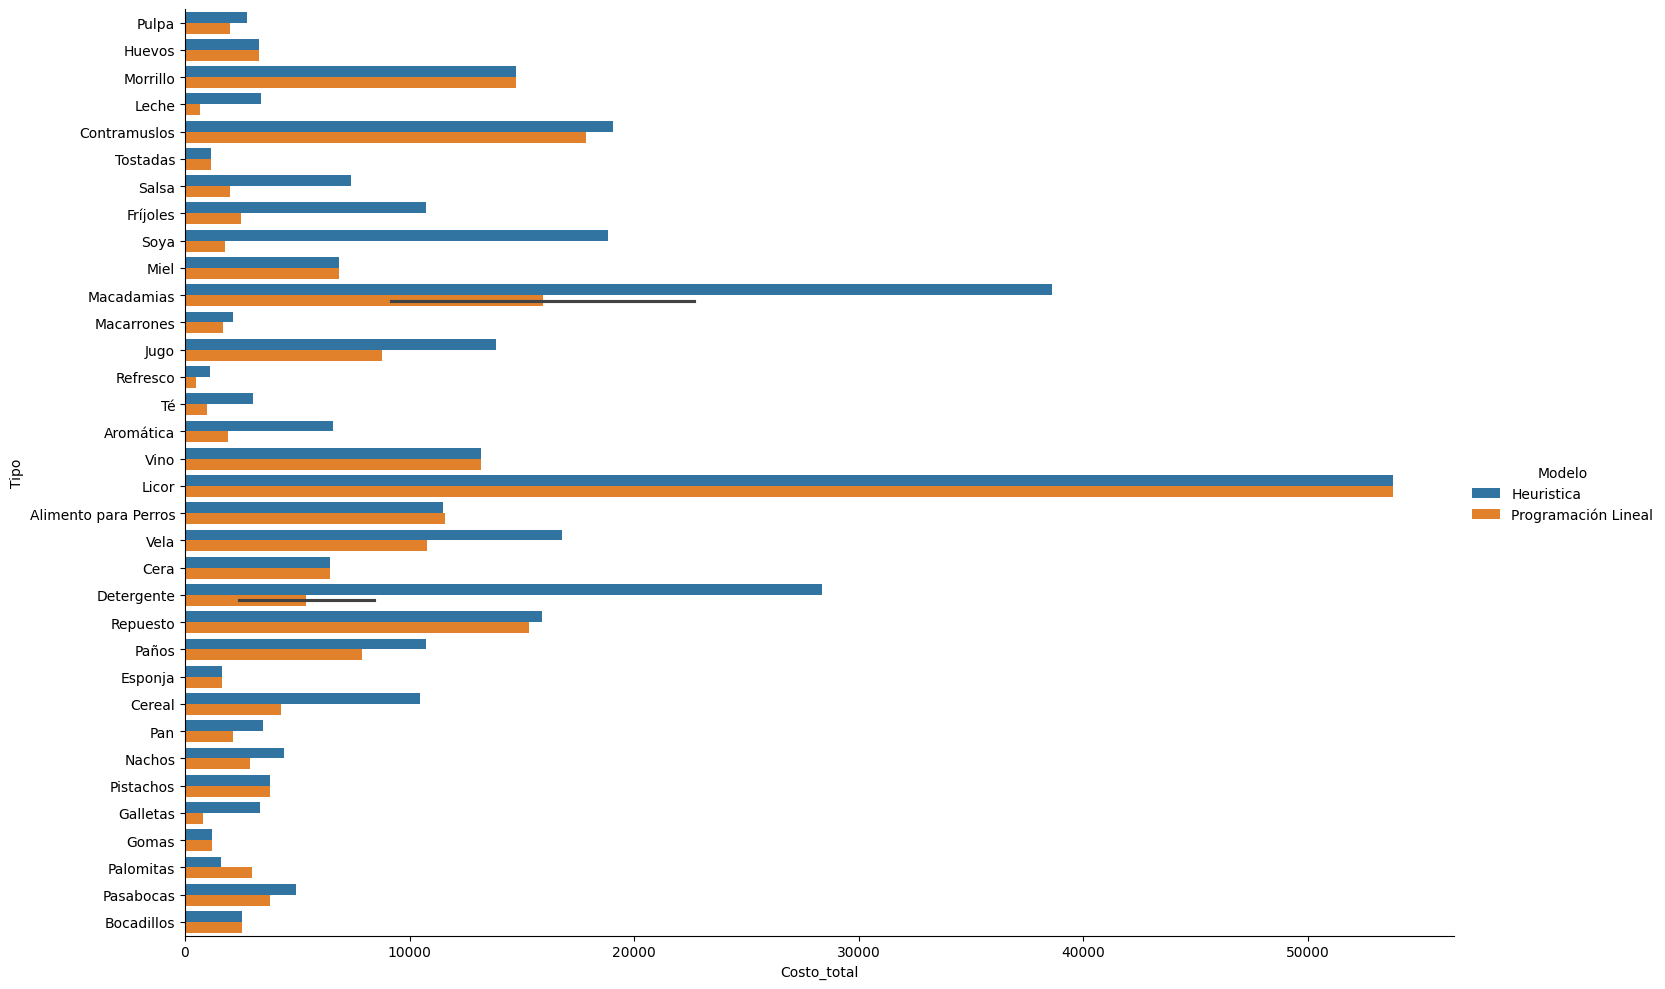

In [779]:
df_concatenado = pd.concat([resultados_df, resultados_PL_df])

# Crea el gráfico de barras
g = sns.catplot(data=df_concatenado, x='Costo_total', y='Tipo', hue='Modelo', kind='bar', height=10, aspect=1.5)

## Conclusiones 

Al comparar la lista de compras optimizada por el modelo de programación lineal con listas generadas por el modelo heuristico, Podemos concluir lo siguiente. Estas conclusiones destacan las ventajas de utilizar un enfoque de modelado matemático para la toma de decisiones en la gestión de compras y presupuestos:

1. **Eficiencia en Costos:**
   - El modelo optimizado proporciona una mayor eficiencia en costos. Esto significa que por el mismo presupuesto, el modelo permite adquirir una cantidad mayor o igual de productos en comparación con el modelo heurístico optimizando así el uso del presupuesto disponible.

2. **Racionalidad y Consistencia:**
   - Las decisiones tomadas a través de la optimización matemática se basan en datos y lógica consistente, en lugar de intuiciones o estimaciones menos precisas. Esto aporta un nivel de racionalidad y previsibilidad que otros métodos pueden carecer.

3. **Reducción del Sesgo Humano:**
   - Al depender de un algoritmo matemático, se reduce el sesgo humano en el proceso de toma de decisiones. Esto puede ser particularmente útil en situaciones donde las decisiones impulsivas o emocionales pueden llevar a un uso ineficiente de los recursos.

4. **Capacidad para Manejar Gran Volumen de Datos:**
   - El modelo puede analizar y procesar un gran volumen de datos (como precios, ubicaciones y características de los productos) más eficientemente que los métodos manuales o heurísticos, lo que es crucial en entornos con una gran cantidad de opciones y variables.

5. **Personalización y Flexibilidad:**
   - El modelo puede adaptarse fácilmente para considerar diferentes escenarios o restricciones, como cambios en el presupuesto, variaciones en los costos de desplazamiento, o la disponibilidad fluctuante de productos, lo que permite una personalización que puede ser difícil de lograr con otros métodos.

6. **Estrategias de Compra Informadas:**
   - La lista optimizada puede revelar patrones y estrategias de compra que no son obvios a simple vista. Por ejemplo, puede identificar almacenes específicos donde es más rentable comprar ciertos productos, lo cual puede ser útil para futuras decisiones de compra.

7. **Limitaciones y Supuestos:**
   - Es importante reconocer que las conclusiones del modelo se basan en los datos y supuestos actuales. Cambios en estos parámetros pueden alterar la validez de la solución propuesta.

8. **Calidad de los datos:**
   - Debido a que el proceso de extracción de los datos se realizó a través de webscraping, esto permite extraer mucha información relevante para el analisis sin embargo es necesario destacar que las técnicas de normalización y categorización no son del todo exactas, por lo que mejores métodos pueden mejorar la precisión del modelo.

9. **Integración de Análisis Predictivo:**
   - Incorporar modelos predictivos podría enriquecer el análisis al anticipar tendencias en los precios o la disponibilidad de productos. Esto permitiría ajustar las estrategias de compra en función de proyecciones futuras, no solo en datos históricos.

2. **Actualización Continua de Datos:**
   - Dado que los precios y la disponibilidad de los productos pueden cambiar rápidamente, es recomendable establecer un sistema de actualización continua de datos. Esto asegura que el modelo utilice la información más reciente para la toma de decisiones.

3. **Inclusión de Factores Externos:**
   - Considerar factores externos como eventos estacionales, promociones especiales o cambios en la economía puede proporcionar una visión más completa y permitir ajustes más precisos en las estrategias de compra.

4. **Análisis de Sensibilidad:**
   - Realizar un análisis de sensibilidad para entender cómo diferentes cambios en los supuestos y parámetros afectan los resultados del modelo. Esto puede ayudar a identificar los factores más críticos que influyen en las decisiones de compra.

5. **Evaluación de la Experiencia del Consumidor:**
   - Considerar aspectos relacionados con la experiencia del consumidor, como la facilidad de compra y la satisfacción con los productos seleccionados, para mejorar no solo la eficiencia en costos sino también la satisfacción general del cliente.

6. **Monitoreo y Ajuste Constante:**
   - Establecer un sistema de monitoreo que permita ajustar el modelo en respuesta a cambios en el mercado o en las preferencias del consumidor. Esto garantiza que el modelo se mantenga relevante y efectivo a lo largo del tiempo.

7. **Implementación de Herramientas de Visualización de Datos:**
   - Desarrollar herramientas de visualización para que los usuarios puedan entender fácilmente los patrones y las recomendaciones del modelo. Esto puede mejorar la usabilidad y la aceptación del sistema.

8. **Colaboración con Expertos del Sector:**
   - Trabajar en colaboración con expertos en retail y análisis de mercado puede proporcionar perspectivas adicionales y ayudar a refinar el modelo para que sea más efectivo en escenarios reales.

9. **Consideración de Aspectos Éticos y de Privacidad:**
   - Asegurarse de que el modelo cumpla con las normativas de privacidad y ética, especialmente en lo que respecta a la recopilación y uso de datos de consumidores.
